XP dividends portifolio analytics 

In [5]:
# default libraries
import pandas as pd
import numpy as np
from itertools import product
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# read database 
from data.select import select_table

operation_info = select_table('Operation')
negotiation_info = select_table('Negotiation')
stocks = select_table('Stock')
dividends = select_table('Dividends')
market = select_table('Market')
quotes = select_table('Quotes')

In [6]:
negotiation_info.sort_values(by='date', ignore_index=True, inplace=True)
first_date = negotiation_info['date'].iloc[0][:10]
last_date = negotiation_info['date'].iloc[-1][:10]
list_dates = negotiation_info['date'].str[:10].tolist()
dividends = dividends[dividends['record_date'] >= first_date]

In [7]:
stocks_name = stocks[['ticker', 'b3_name']]
operation_info = pd.merge(operation_info, stocks_name, how='left', left_on='stock_name', right_on='b3_name')
operation_info = pd.merge(operation_info, negotiation_info[['id', 'date']], how='left', left_on='id_negotiation', right_on='id')
operation_info = operation_info[['date', 'id_negotiation', 'buy_sell', 'ticker', 'quantity', 'price', 'total_value']]
operation_info['date'] = operation_info['date'].str[:10]

In [8]:
# Select and generate a colormap
colormap = cm.get_cmap('tab20', 15)
colors = [colormap(i) for i in range(15)]

Negociation

In [9]:
negotiation_info.info()
display(negotiation_info.head())
display(negotiation_info.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19 non-null     int64  
 1   date                 19 non-null     object 
 2   sell                 19 non-null     float64
 3   buy                  19 non-null     float64
 4   total_value          19 non-null     float64
 5   operation_net_value  19 non-null     float64
 6   settlement_tax       19 non-null     float64
 7   total_cblc           19 non-null     float64
 8   emolumentos          19 non-null     float64
 9   total_bovespa        19 non-null     float64
 10  operational_rate     19 non-null     float64
 11  taxes                19 non-null     float64
 12  irrf                 19 non-null     float64
 13  others               19 non-null     float64
 14  total_costs          19 non-null     float64
 15  net_value            19 non-null     float

,id,date,sell,buy,total_value,operation_net_value,settlement_tax,total_cblc,emolumentos,total_bovespa,operational_rate,taxes,irrf,others,total_costs,net_value
0,54542103,2022-09-01 00:00:00,0.00,4864.21,4864.21,-4864.21,-1.21,-4865.42,-0.24,-0.24,0.00,0.00,0.00,0.00,0.00,-4865.66
1,56133881,2022-10-03 00:00:00,1248.77,1185.27,2434.04,63.50,-0.60,62.90,-0.12,-0.12,-34.40,-3.67,0.06,-1.34,-39.41,23.37
2,57547548,2022-11-01 00:00:00,382.97,279.38,662.35,103.59,-0.16,103.43,-0.03,-0.03,-12.43,-1.32,0.01,-0.48,-14.23,89.18
3,59134579,2022-12-01 00:00:00,983.63,918.53,1902.16,65.10,-0.47,64.63,-0.09,-0.09,-29.08,-3.10,0.04,-1.13,-33.31,31.23
4,60555806,2023-01-03 00:00:00,75.37,35.99,111.36,39.38,-0.02,39.36,0.00,0.00,-2.70,-0.28,0.00,-0.10,-3.08,36.28


,id,sell,buy,total_value,operation_net_value,settlement_tax,total_cblc,emolumentos,total_bovespa,operational_rate,taxes,irrf,others,total_costs,net_value
count,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,6.822262e+07,410.206842,571.499474,981.706316,-161.292632,-0.239474,-161.532105,-0.044211,-0.044211,-12.183158,-1.296316,0.014737,-0.547368,-14.026842,-175.602105
std,8.530941e+06,348.489610,1092.253154,1153.327322,1139.631524,0.288029,1139.866570,0.058149,0.058149,10.255529,1.095330,0.017117,0.424668,11.758084,1136.558166
min,5.454210e+07,0.000000,0.000000,111.360000,-4864.210000,-1.210000,-4865.420000,-0.240000,-0.240000,-34.400000,-3.670000,0.000000,-1.340000,-39.410000,-4865.660000
25%,6.136341e+07,122.800000,74.465000,211.310000,64.300000,-0.285000,63.765000,-0.050000,-0.050000,-16.140000,-1.720000,0.000000,-0.920000,-18.810000,45.565000
50%,6.811375e+07,353.370000,257.980000,612.510000,96.550000,-0.150000,96.400000,-0.030000,-0.030000,-10.510000,-1.120000,0.010000,-0.480000,-12.250000,83.010000
75%,7.549352e+07,519.305000,521.460000,1154.990000,119.745000,-0.045000,119.620000,-0.005000,-0.005000,-3.280000,-0.345000,0.020000,-0.160000,-3.810000,108.520000
max,8.166340e+07,1248.770000,4864.210000,4864.210000,201.930000,-0.020000,201.810000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,190.270000


In [10]:
negotiation_values = pd.DataFrame(negotiation_info.iloc[:, 2:].sum(), columns=['absolute (R$)'])
selected_rows = ['sell', 'buy']
negotiation_values.loc[selected_rows, 'percentual (%)'] = (negotiation_values.loc[selected_rows, 'absolute (R$)'] / negotiation_values.loc['total_value', 'absolute (R$)'] * 100).round(2)
cost_rows = ['settlement_tax', 'emolumentos', 'operational_rate', 'taxes', 'others', 'total_costs']
total_costs_tax = negotiation_values.loc[['total_costs', 'total_bovespa', 'settlement_tax'], 'absolute (R$)'].sum()
negotiation_values.loc[cost_rows, 'percentual (%)'] = (negotiation_values.loc[cost_rows, 'absolute (R$)'] / total_costs_tax * 100).round(2)
display(negotiation_values)
display(negotiation_values.loc[['operational_rate', 'taxes', 'others','settlement_tax', 'emolumentos'], :])
print('Total costs:\n {}'.format(negotiation_values.loc[['operational_rate', 'taxes', 'others','settlement_tax', 'emolumentos'], :].sum()))

,absolute (R$),percentual (%)
sell,7793.93,41.79
buy,10858.49,58.21
total_value,18652.42,NaN
operation_net_value,-3064.56,NaN
settlement_tax,-4.55,1.67
total_cblc,-3069.11,NaN
emolumentos,-0.84,0.31
total_bovespa,-0.84,NaN
operational_rate,-231.48,85.13
taxes,-24.63,9.06


,absolute (R$),percentual (%)
operational_rate,-231.48,85.13
taxes,-24.63,9.06
others,-10.40,3.82
settlement_tax,-4.55,1.67
emolumentos,-0.84,0.31


Total costs:
 absolute (R$)    -271.90
percentual (%)     99.99
dtype: float64


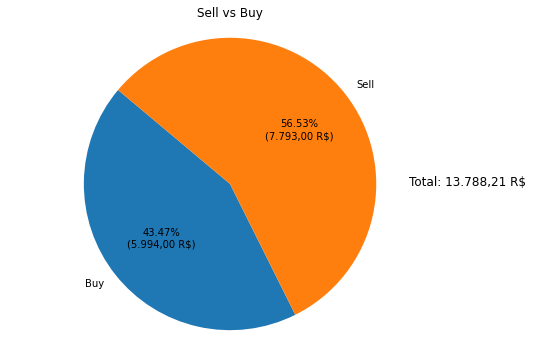

In [11]:
# percentage of money of buy and sell operations
def absolute_values(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    absolute_fmt = locale.currency(absolute, grouping=True, symbol=True)
    return "{:.2f}%\n({})".format(pct, absolute_fmt)

negotiation_info_without_first = negotiation_info[1:]
[buy, sell, total] = negotiation_info_without_first[['buy', 'sell', 'total_value']].sum().T

plt.figure(figsize=(8, 6))
plt.pie([buy, sell], labels=['Buy', 'Sell'], autopct=lambda pct: absolute_values(pct, [buy, sell]), startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(0.9, 0.5, f'Total: {"{}".format(locale.currency(total, grouping=True, symbol=True))}', fontsize=12, transform=plt.gca().transAxes)
plt.title('Sell vs Buy')
plt.show()

Operation

In [12]:
operation_info.info()
display(operation_info.head())
display(operation_info.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            334 non-null    object 
 1   id_negotiation  334 non-null    int64  
 2   buy_sell        334 non-null    object 
 3   ticker          334 non-null    object 
 4   quantity        334 non-null    int64  
 5   price           334 non-null    float64
 6   total_value     334 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 20.9+ KB


,date,id_negotiation,buy_sell,ticker,quantity,price,total_value
0,2022-09-01,54542103,C,BBAS3,17,41.60,-707.20
1,2022-09-01,54542103,C,CPLE6,10,7.05,-70.50
2,2022-09-01,54542103,C,CPLE6,2,6.97,-13.94
3,2022-09-01,54542103,C,CPLE6,7,7.00,-49.00
4,2022-09-01,54542103,C,CPLE6,4,7.01,-28.04


,id_negotiation,quantity,price,total_value
count,3.340000e+02,334.000000,334.000000,334.000000
mean,6.467634e+07,2.925150,20.226168,-9.175329
std,7.974887e+06,5.319557,12.667311,110.499476
min,5.454210e+07,1.000000,6.740000,-901.530000
25%,5.754755e+07,1.000000,12.252500,-24.127500
50%,6.351146e+07,1.000000,14.925000,9.715000
75%,6.977784e+07,3.000000,25.937500,25.910000
max,8.166340e+07,63.000000,77.990000,449.680000


In [13]:
stocks_negociated = operation_info['ticker'].unique()
stocks_info = stocks[stocks['ticker'].isin(stocks_negociated)]
stocks_info = stocks_info [[
    'type', 'ticker', 'b3_name', 'long_name', 
    'b3_segment', 'b3_sector', 'b3_subsector', 
    'is_b3_listed', 'is_foreign', 'is_state_owned'
]]
display(stocks_info[['ticker', 'long_name', 'b3_segment', 'b3_sector']])

,ticker,long_name,b3_segment,b3_sector
31,AURE3,Auren Energia S.A.,Energia Elétrica,Utilidade Pública
36,B3SA3,"B3 S.A. - Brasil, Bolsa, Balcão",Serviços Financeiros Diversos,Financeiro
42,BBAS3,Banco do Brasil S.A.,Bancos,Financeiro
44,BBDC4,Banco Bradesco S.A.,Bancos,Financeiro
156,CPLE6,Companhia Paranaense de Energia - COPEL,Energia Elétrica,Utilidade Pública
168,CSMG3,Companhia de Saneamento de Minas Gerais,Água e Saneamento,Utilidade Pública
206,EGIE3,Engie Brasil Energia S.A.,Energia Elétrica,Utilidade Pública
258,GGBR4,Gerdau S.A.,Siderurgia,Materiais Básicos
317,ITUB4,Itaú Unibanco Holding S.A.,Bancos,Financeiro
329,KLBN11,Klabin S.A.,Papel e Celulose,Materiais Básicos


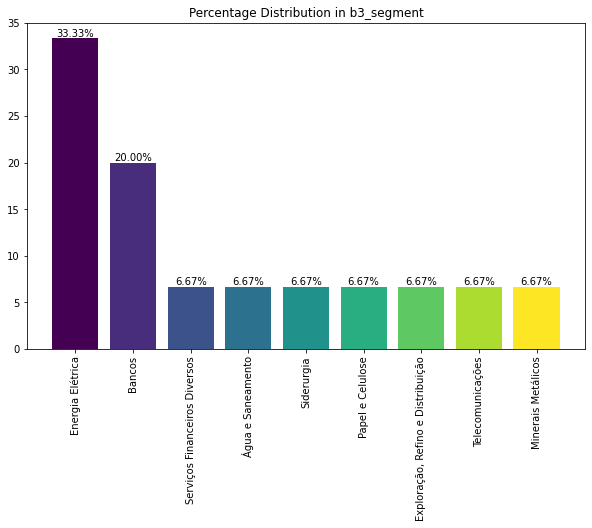

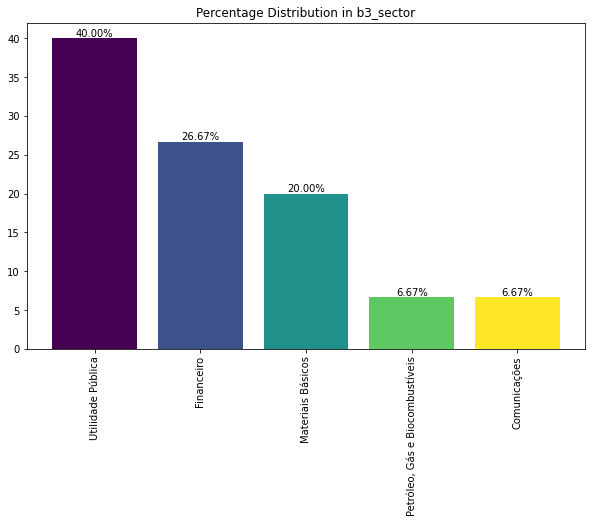

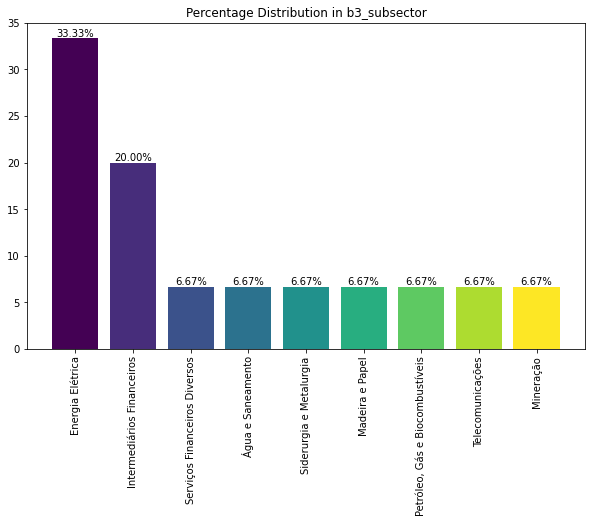

In [14]:
# Function to plot percentage distribution bar chart for a given column
stocks_types = stocks_info[['b3_segment', 'b3_sector', 'b3_subsector']].reset_index(drop=True)

def plot_percentage_distribution(column):
    # Calculate the percentage of each category
    counts = stocks_types[column].value_counts(normalize=True) * 100
    categories = counts.index
    percentages = counts.values
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(categories, percentages, color=colors)
    plt.title(f'Percentage Distribution in {column}')
    plt.xticks(rotation=90)
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

    plt.show()

for column in stocks_types.columns:
    plot_percentage_distribution(column)

In [15]:
# TODO: Calculate the average price per stock by dividing the total value by the quantity for each stock.
grouped_stocks = operation_info.groupby(['date', 'id_negotiation', 'buy_sell', 'ticker']).agg({'quantity': 'sum', 'total_value': 'sum'}).reset_index()
grouped_stocks = grouped_stocks.rename(columns={'quantity': 'quantity_sum', 'total_value': 'value_sum'})
grouped_stocks['average_price'] = grouped_stocks['value_sum']/grouped_stocks['quantity_sum']
grouped_stocks['average_price'] = grouped_stocks['average_price'].round(2)
grouped_stocks.loc[grouped_stocks['buy_sell'] == 'V', 'quantity_sum'] *= -1

In [16]:
# TODO: Calculate the position of stocks in each month
stocks_each_month = grouped_stocks.copy()
stocks_each_month = stocks_each_month.groupby(['date','ticker']).agg({'quantity_sum': 'sum', 'value_sum': 'sum'}).reset_index()
stocks_each_month.sort_values(by=['date', 'ticker'], inplace=True, ignore_index=True)
stocks_each_month['average_price'] = grouped_stocks['value_sum']/grouped_stocks['quantity_sum']
stocks_each_month['average_price'] = grouped_stocks['average_price'].round(2)
stocks_each_month['date'] = pd.to_datetime(stocks_each_month['date'])
stocks_each_month['cumulative_quantity'] = stocks_each_month.groupby('ticker')['quantity_sum'].cumsum()
# display(stocks_each_month)

stocks_each_month['year_month'] = stocks_each_month['date'].dt.to_period('M')
monthly_positions = stocks_each_month.groupby(['ticker', 'year_month']).agg(
    monthly_position=('cumulative_quantity', 'last')
).reset_index()
monthly_positions.sort_values(by=['year_month', 'ticker'], inplace=True, ignore_index=True)
# display(monthly_positions)

# Create a period range that covers all months in your dataset
periods = pd.period_range(start=stocks_each_month['year_month'].min(), end=stocks_each_month['year_month'].max(), freq='M')
tickers = stocks_each_month['ticker'].unique()
all_combinations = pd.DataFrame(list(product(periods, tickers)), columns=['year_month', 'ticker'])
merged_positions = pd.merge(all_combinations, monthly_positions, on=['year_month', 'ticker'], how='left')
merged_positions.sort_values(by=['ticker', 'year_month'], inplace=True, ignore_index=True)

# Use forward fill to propagate last known monthly_position values
merged_positions['monthly_position'] = merged_positions.groupby('ticker')['monthly_position'].ffill()
merged_positions = merged_positions.fillna(0)
merged_positions['monthly_position'] = merged_positions['monthly_position'].astype(int)
monthly_totals = merged_positions.pivot_table(index='year_month', columns='ticker', values='monthly_position', aggfunc='sum', fill_value=0)
display(monthly_totals)

# with pd.option_context('display.max_rows', None):  # None means display all rows
#     display()


ticker,AURE3,B3SA3,BBAS3,BBDC4,CPLE6,CSMG3,EGIE3,GGBR4,ITUB4,KLBN11,PETR4,TAEE11,TIMS3,TRPL4,VALE3
year_month,,,,,,,,,,,,,,,
2022-09,0,0,17,0,106,0,18,0,0,39,29,0,63,10,0
2022-10,0,51,0,23,105,0,18,0,0,39,14,0,58,10,0
2022-11,0,51,0,37,92,0,18,0,0,35,8,0,57,10,0
2022-12,0,0,0,44,112,0,17,0,25,34,0,0,52,9,0
2023-01,0,0,0,44,110,0,17,0,26,31,0,0,53,9,0
2023-02,0,0,0,45,108,0,16,0,25,32,0,0,54,9,0
2023-03,14,0,10,0,115,0,15,0,23,31,0,0,49,9,0
2023-04,12,0,10,0,112,0,14,0,23,32,0,0,47,9,0
2023-05,13,0,9,0,104,0,15,0,24,32,0,0,44,9,0


In [17]:
# TODO: Calculate the total financial value of stocks by each month's operation
quotes_monthly = quotes[quotes['date'].isin(list_dates)].copy()
quotes_monthly['date'] = pd.to_datetime(quotes_monthly['date'])
quotes_monthly['year_month'] = quotes_monthly['date'].dt.to_period('M')

quotes_monthly = quotes_monthly.pivot_table(index='year_month', columns='ticker', values='close', fill_value=0)
month_stock_values = monthly_totals * quotes_monthly
month_stock_values['total'] = month_stock_values.sum(axis=1)
display(month_stock_values)
month_stock_percent = month_stock_values.loc[:, month_stock_values.columns != 'total'].div(month_stock_values['total'], axis=0) * 100
month_stock_percent = month_stock_percent.round(2)

ticker,AURE3,B3SA3,BBAS3,BBDC4,CPLE6,CSMG3,EGIE3,GGBR4,ITUB4,KLBN11,PETR4,TAEE11,TIMS3,TRPL4,VALE3,total
year_month,,,,,,,,,,,,,,,,
2022-09,0.00,0.00,719.610,0.00,752.600,0.000,735.12,0.00,0.00,725.40,981.65,0.00,738.990,238.10,0.000,4891.470
2022-10,0.00,707.88,0.000,487.83,718.200,0.000,730.62,0.00,0.00,730.86,450.52,0.00,729.060,238.80,0.000,4793.770
2022-11,0.00,771.12,0.000,738.89,741.520,0.000,723.06,0.00,0.00,750.40,238.88,0.00,759.810,240.80,0.000,4964.480
2022-12,0.00,0.00,0.000,677.60,909.440,0.000,683.57,0.00,649.50,671.50,0.00,0.00,676.000,205.38,0.000,4472.990
2023-01,0.00,0.00,0.000,616.00,825.000,0.000,628.66,0.00,623.48,623.72,0.00,0.00,619.570,200.07,0.000,4136.500
2023-02,0.00,0.00,0.000,618.75,842.400,0.000,622.08,0.00,624.50,629.44,0.00,0.00,624.240,203.04,0.000,4164.450
2023-03,206.08,0.00,390.000,0.00,806.150,0.000,589.35,0.00,575.00,608.22,0.00,0.00,599.760,195.75,0.000,3970.310
2023-04,173.76,0.00,386.500,0.00,784.000,0.000,555.24,0.00,552.69,583.36,0.00,0.00,579.980,194.22,0.000,3809.750
2023-05,205.66,0.00,376.560,0.00,834.080,0.000,616.20,0.00,597.60,613.76,0.00,0.00,620.840,208.08,0.000,4072.780


In [18]:
month_sector_values = pd.melt(month_stock_values.reset_index(), id_vars=['year_month'], var_name=['ticker'], value_name='financial')
month_sector_values = month_sector_values.merge(stocks_info[['ticker', 'b3_segment', 'b3_sector']], how='left', on='ticker')

segment_totals = month_sector_values.pivot_table(index='year_month', columns='b3_segment', values='financial', aggfunc='sum', fill_value=0)
segment_totals['total'] = segment_totals.sum(axis=1)
segment_percent = segment_totals.loc[:, segment_totals.columns != 'total'].div(segment_totals['total'], axis=0) * 100
segment_percent = segment_percent.round(2)

sector_totals = month_sector_values.pivot_table(index='year_month', columns='b3_sector', values='financial', aggfunc='sum', fill_value=0)
sector_totals['total'] = sector_totals.sum(axis=1)
sector_percent = sector_totals.loc[:, sector_totals.columns != 'total'].div(sector_totals['total'], axis=0) * 100
sector_percent = sector_percent.round(2)


<Figure size 864x720 with 0 Axes>

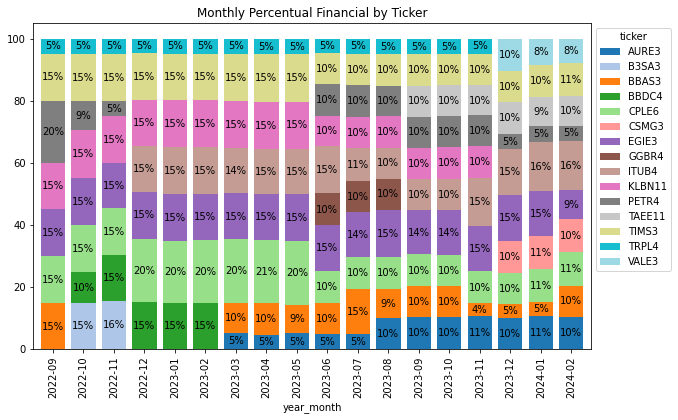

<Figure size 864x720 with 0 Axes>

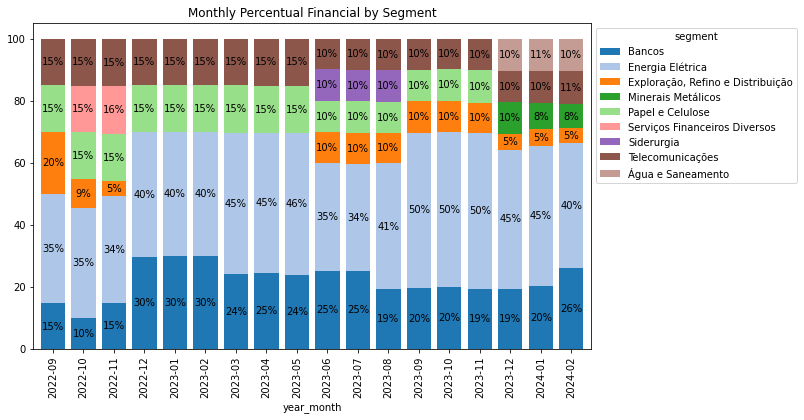

<Figure size 864x720 with 0 Axes>

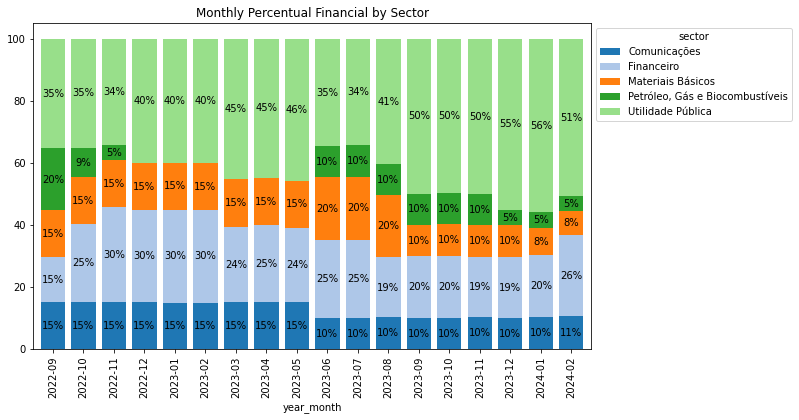

In [19]:
plt.figure(figsize=(12, 10))
ax = month_stock_percent.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, color=colors)
ax.legend(title='ticker', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Monthly Percentual Financial by Ticker')

for c in ax.containers:
    labels = [f'{v.get_height():.0f}%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.figure(figsize=(12, 10))
ax = segment_percent.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, color=colors)
ax.legend(title='segment', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Monthly Percentual Financial by Segment')

for c in ax.containers:
    labels = [f'{v.get_height():.0f}%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.figure(figsize=(12, 10))
ax = sector_percent.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, color=colors)
ax.legend(title='sector', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Monthly Percentual Financial by Sector')

for c in ax.containers:
    labels = [f'{v.get_height():.0f}%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

In [20]:
negociation_net = negotiation_info[['date', 'net_value']].copy()
negociation_net['date'] = pd.to_datetime(negociation_net['date'])
negociation_net['date'] = negociation_net['date'].dt.to_period('M')
negociation_net.rename(columns={'date': 'year_month'}, inplace=True)
negociation_net = negociation_net.groupby(['year_month']).agg(
    net_value=('net_value', 'sum')
).reset_index()
negociation_net.index = negociation_net['year_month']
negociation_net = negociation_net[['net_value']]
negociation_net.loc['2022-09', 'net_value'] = 0

month_stock_total = month_stock_values[['total']].copy()
month_stock_total['net_value'] = negociation_net['net_value'].copy()
month_stock_total['cumulative_net'] = month_stock_total['net_value'].cumsum()
month_stock_total['total_net'] = month_stock_total['total'] + month_stock_total['cumulative_net']
month_stock_total['validate'] = month_stock_total['total_net'] > month_stock_total.loc['2022-09', 'total']
display(month_stock_total)

ticker,total,net_value,cumulative_net,total_net,validate
year_month,,,,,
2022-09,4891.470,0.00,0.00,4891.470,False
2022-10,4793.770,23.37,23.37,4817.140,False
2022-11,4964.480,89.18,112.55,5077.030,True
2022-12,4472.990,31.23,143.78,4616.770,False
2023-01,4136.500,36.28,180.06,4316.560,False
2023-02,4164.450,31.49,211.55,4376.000,False
2023-03,3970.310,76.82,288.37,4258.680,False
2023-04,3809.750,95.76,384.13,4193.880,False
2023-05,4072.780,60.09,444.22,4517.000,False


<Figure size 864x720 with 0 Axes>

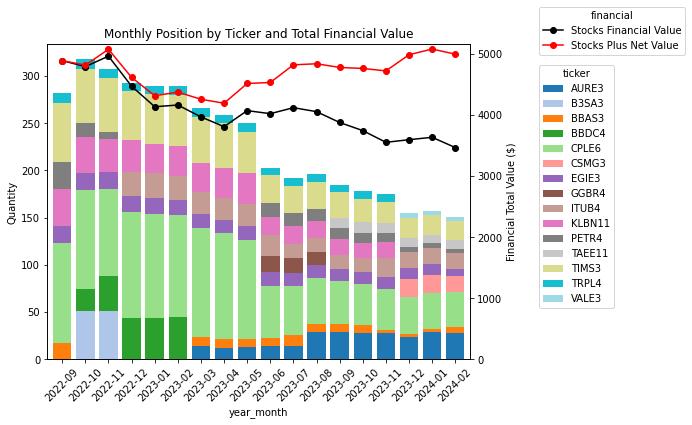

In [21]:
plt.figure(figsize=(12, 10))

ax = monthly_totals.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, color=colors)
ax.set_ylabel('Quantity')
ax2 = plt.gca().twinx()
ax2.plot(month_stock_total.index.astype(str), month_stock_total['total'], color='black', marker='o', label='Stocks Financial Value')
ax2.plot(month_stock_total.index.astype(str), month_stock_total['total_net'], color='red', marker='o', label='Stocks Plus Net Value')
ax2.set_ylabel('Financial Total Value ($)')
ax2.set_yticks(np.arange(6000, step=1000))

ax.set_xticks(np.arange(len(monthly_totals.index)))
ax.set_xticklabels(monthly_totals.index.astype(str), rotation=45)
ax.legend(title='ticker', bbox_to_anchor=(1.15, 0.95), loc='upper left')
ax2.legend(title='financial', bbox_to_anchor=(1.15, 0.95), loc='lower left')

plt.title('Monthly Position by Ticker and Total Financial Value')
plt.tight_layout()
plt.show()

In [22]:
# TODO: Filtered each stock operations and calculated variation average price
each_stock = grouped_stocks.groupby(['buy_sell', 'ticker']).agg({'quantity_sum': 'sum', 'value_sum': 'sum'}).reset_index()
each_stock['average_price'] = (-1) * each_stock['value_sum']/each_stock['quantity_sum']
each_stock['average_price'] = each_stock['average_price'].round(2)
each_stock.sort_values(by=['ticker', 'buy_sell'], inplace=True, ignore_index=True)
# display(each_stock)

buy_df = each_stock[each_stock['buy_sell'] == 'C']
buy_df = buy_df.drop('buy_sell', axis=1)
buy_df.columns = ['ticker','quantity_buy', 'sum_buy', 'average_price_buy']

sell_df = each_stock[each_stock['buy_sell'] == 'V']
sell_df = sell_df.drop('buy_sell', axis=1)
sell_df.columns = ['ticker','quantity_sell', 'sum_sell', 'average_price_sell']
sell_df['quantity_sell'] = sell_df['quantity_sell'].abs()

merged_df = pd.merge(buy_df, sell_df, on='ticker', suffixes=('_buy', '_sell'))
merged_df['variation_price'] = ((merged_df['average_price_sell'] - merged_df['average_price_buy']) / merged_df['average_price_buy']) * 100
merged_df['quantity'] = merged_df['quantity_buy'] - merged_df['quantity_sell']
merged_df['total_financial'] = merged_df['sum_buy'] + merged_df['sum_sell']
display(merged_df[['ticker', 'average_price_buy', 'average_price_sell', 'variation_price']])
merged_df.sort_values(by=['quantity', 'total_financial'], inplace=True, ignore_index=True)

,ticker,average_price_buy,average_price_sell,variation_price
0,AURE3,14.31,14.43,0.838574
1,B3SA3,13.78,12.32,-10.595065
2,BBAS3,43.01,43.33,0.744013
3,BBDC4,19.63,12.81,-34.742741
4,CPLE6,7.22,7.78,7.756233
5,CSMG3,19.62,21.20,8.053007
6,EGIE3,40.72,40.85,0.319253
7,GGBR4,24.36,26.41,8.415435
8,ITUB4,26.09,28.20,8.087390
9,KLBN11,18.71,20.99,12.185997


Dividends

In [23]:
dividends.info()
display(dividends.head())
display(dividends.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   payable_date  322 non-null    object 
 1   record_date   328 non-null    object 
 2   cvm_code      328 non-null    int64  
 3   type          310 non-null    object 
 4   ticker        328 non-null    object 
 5   amount        328 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 17.9+ KB


,payable_date,record_date,cvm_code,type,ticker,amount
0,2025-01-02,2024-12-02,906,interest,BBDC4,0.018975
1,2025-01-02,2024-12-02,906,interest,BBDC3,0.017250
2,2025-01-02,2024-11-29,19348,interest,ITUB4,0.017650
3,2025-01-02,2024-11-29,19348,interest,ITUB3,0.017650
4,2024-12-02,2024-11-01,906,interest,BBDC4,0.018975


,cvm_code,amount
count,328.000000,328.000000
mean,11899.969512,0.261477
std,8026.917256,0.398755
min,906.000000,0.000529
25%,1023.000000,0.017650
50%,12653.000000,0.069192
75%,19348.000000,0.330429
max,26620.000000,1.961247


In [24]:
# TODO: Calculate dividends of each stock
dividends_stock = dividends[dividends['ticker'].isin(stocks_info['ticker'])]

In [25]:
# TODO: Calculate the stocks quantity had in day of record_date and plus it with amount
dividends_earned = pd.DataFrame(columns=['record_date', 'payable_date', 'ticker', 'quantity', 'dividends_earned'])
rows_list = []

# Iterate through each row in the dividends DataFrame to calculate dividends earned per record_date
for index, dividend_row in dividends_stock.iterrows():
    payable_date = dividend_row['payable_date']
    record_date = dividend_row['record_date']
    ticker = dividend_row['ticker']
    amount = dividend_row['amount']
    type = dividend_row['type']

    relevant_operations = grouped_stocks[(grouped_stocks['ticker'] == ticker) & (grouped_stocks['date'] <= record_date)]
    net_shares = relevant_operations['quantity_sum'].sum()
    total_dividends = net_shares * amount
    # Subtract taxes percent
    if type != 'dividend':
        total_dividends *= 0.85

    rows_list.append({'payable_date': payable_date, 'record_date': record_date, 'ticker': ticker, 'quantity': net_shares, 'dividends_earned': total_dividends})

dividends_earned = pd.concat([dividends_earned, pd.DataFrame(rows_list)], ignore_index=True)
dividends_earned = dividends_earned[dividends_earned['quantity'] > 0]
# dividends_earned = dividends_earned[dividends_earned['payable_date'] < '2024-02-02']
dividends_earned = dividends_earned[dividends_earned['record_date'] < '2024-02-02']
dividends_earned['year_month'] = pd.to_datetime(dividends_earned['record_date'])
dividends_earned['year_month'] = dividends_earned['year_month'].dt.to_period('M')
dividends_earned.sort_values(by=['record_date', 'ticker'], ignore_index=True, inplace=True)
# display(dividends_earned)

dividends_monthly = dividends_earned.groupby(['year_month']).agg(
    value=('dividends_earned', 'sum')
).reset_index()
dividends_monthly.sort_values(by=['year_month'], inplace=True, ignore_index=True)
dividends_monthly.index = dividends_monthly['year_month']
dividends_monthly = dividends_monthly.drop('year_month', axis=1)
dividends_monthly = pd.concat([dividends_monthly, month_stock_total[['total']]], axis=1)
dividends_monthly['dy'] = dividends_monthly['value']/dividends_monthly['total'] * 100
dividends_monthly.drop(['2024-02'], inplace=True)
display(dividends_monthly)

dividends_earned_summary = dividends_earned.groupby(['ticker']).sum(numeric_only=True).reset_index()
dividends_earned_summary.sort_values(by=['dividends_earned', 'ticker'], ascending=False, ignore_index=True, inplace=True)
display(dividends_earned_summary)

print('Total dividends: R${}'.format(dividends_earned['dividends_earned'].sum()))
    

,value,total,dy
year_month,,,
2022-09,14.573984,4891.470,0.297947
2022-10,16.987563,4793.770,0.354368
2022-11,65.913031,4964.480,1.327693
2022-12,32.338497,4472.990,0.722973
2023-01,22.919096,4136.500,0.554070
2023-02,11.133510,4164.450,0.267346
2023-03,8.459472,3970.310,0.213068
2023-04,15.789795,3809.750,0.414458
2023-05,57.897966,4072.780,1.421583


,ticker,dividends_earned
0,PETR4,80.182317
1,EGIE3,55.700808
2,AURE3,55.500000
3,KLBN11,47.201148
4,TIMS3,46.183397
5,CPLE6,41.800777
6,ITUB4,31.637578
7,BBAS3,26.572379
8,BBDC4,24.932190
9,CSMG3,22.565464


Total dividends: R$457.44487468645


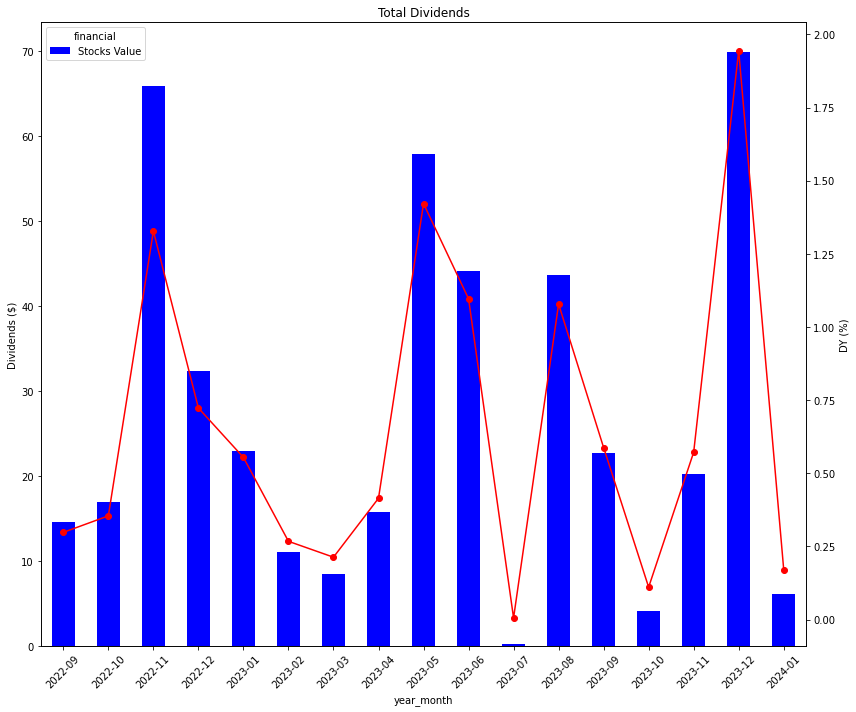

In [39]:
plt.figure(figsize=(12, 10))
ax = dividends_monthly['value'].plot(kind='bar', color='blue', label='Stocks Value')
ax2 = plt.gca().twinx()
ax2.plot(dividends_monthly.index.astype(str), dividends_monthly['dy'], color='red', marker='o', label='Stocks Plus Fiance Value')
ax.set_ylabel('Dividends ($)')
ax2.set_ylabel('DY (%)')
ax.set_xticklabels(dividends_monthly.index.astype(str), rotation=45)
ax.legend(title='financial', loc='upper left')
plt.title('Total Dividends')
plt.tight_layout()
plt.show()

In [139]:
# TODO: Calculate DY
money_invested = month_stock_total.loc['2022-09', 'total']
money_returned = month_stock_total.loc['2024-02', 'cumulative_net']
money_dividends = dividends_earned['dividends_earned'].sum()
dy = money_dividends/money_invested * 100
dy_average = dy/month_stock_total.shape[0]
print('Dividend Yield:')
print(f'DY: {dy:.2f}%\nAverage DY by stock: {dy_average:.2f}%\n')

dy_returned = money_dividends/(money_invested - money_returned) * 100
dy_average_returned = dy_returned/month_stock_total.shape[0]
print('Removing the value returned in operations:')
print(f'DY: {dy_returned:.2f}%\nAverage DY by stock: {dy_average_returned:.2f}%')

Dividend Yield:
DY: 9.35%
Average DY by stock: 0.52%

Removing the value returned in operations:
DY: 13.61%
Average DY by stock: 0.76%


In [203]:
print('Total dividends: R${}'.format(dividends_earned['dividends_earned'].sum()))
print('Total portfolio value: R${}'.format(month_stock_total.loc['2024-02', 'total'].sum()))
print('Total net income: R${}'.format(month_stock_total.loc['2024-02', 'cumulative_net'].sum()))

total = dividends_earned['dividends_earned'].sum() + month_stock_total.loc['2024-02', 'total'].sum() + month_stock_total.loc['2024-02', 'cumulative_net'].sum()
print(f'Total financial: R${total:.2f}')
gain = (total-money_invested)/money_invested * 100
print(f'Gain: {gain:.2f}%')

Total dividends: R$457.44487468645
Total portfolio value: R$3467.9300000000003
Total net income: R$1529.22
Total financial: R$5454.59
Gain: 11.51%


Market

In [148]:
market.info()
display(market.head())
display(market.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        362 non-null    datetime64[ns]
 1   ibov        353 non-null    float64       
 2   selic       355 non-null    float64       
 3   ipca        17 non-null     float64       
 4   year_month  362 non-null    period[M]     
dtypes: datetime64[ns](1), float64(3), period[M](1)
memory usage: 14.3 KB


,date,ibov,selic,ipca,year_month
0,2022-09-01,110405.30,13.65,-0.29,2022-09
1,2022-09-02,110864.24,13.65,NaN,2022-09
2,2022-09-05,112203.35,13.65,NaN,2022-09
3,2022-09-06,109763.77,13.65,NaN,2022-09
4,2022-09-08,109915.64,13.65,NaN,2022-09


,ibov,selic,ipca
count,353.000000,355.000000,17.000000
mean,114561.855864,13.209155,0.369412
std,8024.055121,0.692489,0.290226
min,97926.340000,11.150000,-0.290000
25%,108963.700000,12.650000,0.230000
50%,114169.630000,13.650000,0.410000
75%,118695.320000,13.650000,0.590000
max,134193.720000,13.650000,0.840000


In [149]:
selic = market[['year_month', 'date', 'selic']].copy()
selic = selic[~selic['selic'].isnull()]
selic['selic'] = ((1+selic['selic']/100)**(1/252)-1)
selic['cumluative'] = ((selic['selic'] + 1).cumprod() - 1)*100
selic['variation'] = (selic['cumluative'] - selic.loc[0, 'cumluative'])
# display(selic)

negotiation_net_selic = negotiation_info[['date', 'net_value']].copy()
negotiation_net_selic.loc[0, 'net_value'] = 0
negotiation_net_selic['date'] = pd.to_datetime(negotiation_net_selic['date'])
# display(negotiation_net_selic)

percent_selic = selic[selic['date'].isin(negotiation_net_selic['date'])][['date', 'variation']]
percent_selic.reset_index(inplace=True, drop=True)
percent_selic['percent_apply'] = percent_selic.loc[len(negotiation_net_selic)-1, 'variation'] - percent_selic['variation']
percent_selic = percent_selic[['date', 'percent_apply']]

negotiation_net_selic = negotiation_net_selic.merge(percent_selic, how='left', on='date')
negotiation_net_selic['net_selic'] = negotiation_net_selic['net_value'] * (1 + negotiation_net_selic['percent_apply']/100)
negotiation_net_selic['year_month'] = negotiation_net_selic['date'].dt.to_period('M')
negotiation_net_selic = negotiation_net_selic.groupby(['year_month']).agg({'net_selic': 'sum'})
# display(negotiation_net_selic)


In [150]:
month_stock_total_selic = month_stock_total.merge(negotiation_net_selic, how='left', left_index=True, right_index=True)
month_stock_total_selic['cumulative_net_selic'] = month_stock_total_selic['net_selic'].cumsum()
month_stock_total_selic['total_net_selic'] = month_stock_total_selic['total'] + month_stock_total_selic['cumulative_net_selic']
display(month_stock_total_selic)

,total,net_value,cumulative_net,total_net,validate,net_selic,cumulative_net_selic,total_net_selic
year_month,,,,,,,,
2022-09,4891.470,0.00,0.00,4891.470,False,0.000000,0.000000,4891.470000
2022-10,4793.770,23.37,23.37,4817.140,False,27.569954,27.569954,4821.339954
2022-11,4964.480,89.18,112.55,5077.030,True,104.286576,131.856531,5096.336531
2022-12,4472.990,31.23,143.78,4616.770,False,36.194553,168.051084,4641.041084
2023-01,4136.500,36.28,180.06,4316.560,False,41.607538,209.658622,4346.158622
2023-02,4164.450,31.49,211.55,4376.000,False,35.761695,245.420316,4409.870316
2023-03,3970.310,76.82,288.37,4258.680,False,86.496500,331.916816,4302.226816
2023-04,3809.750,95.76,384.13,4193.880,False,106.624277,438.541094,4248.291094
2023-05,4072.780,60.09,444.22,4517.000,False,66.312935,504.854029,4577.634029


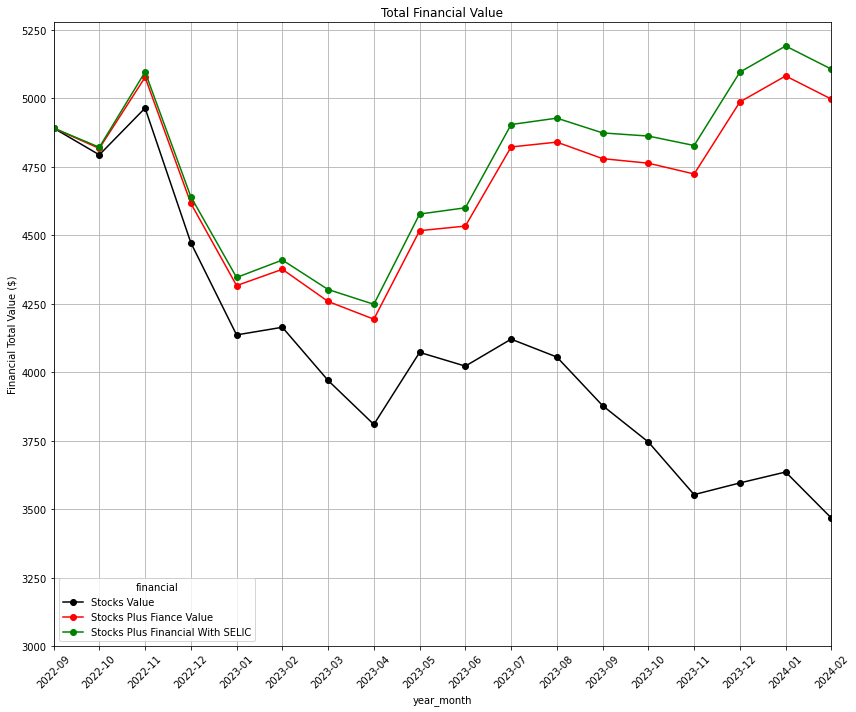

In [151]:
plt.figure(figsize=(12, 10))
ax = month_stock_total_selic['total'].plot(kind='line', color='black', marker='o', label='Stocks Value')
month_stock_total_selic['total_net'].plot(kind='line', color='red', marker='o', label='Stocks Plus Fiance Value')
month_stock_total_selic['total_net_selic'].plot(kind='line', color='green', marker='o', label='Stocks Plus Financial With SELIC')
ax.set_ylabel('Financial Total Value ($)')
ax.set_yticks(np.arange(3000,5500, step=250))
ax.set_xticks(month_stock_total_selic.index)
ax.set_xticklabels(month_stock_total_selic.index.astype(str), rotation=45)
ax.legend(title='financial', loc='lower left')
plt.grid()
plt.title('Total Financial Value')
plt.tight_layout()
plt.show()

In [162]:
month_selic = month_stock_total_selic[['total_net_selic']].copy()
month_selic['financial_var'] = month_selic['total_net_selic'] - month_selic.loc['2022-09', 'total_net_selic']
month_selic['selic_portfolio'] = month_selic['financial_var'] /month_selic.loc['2022-09', 'total_net_selic'] * 100
month_selic['selic_portfolio'] = month_selic['selic_portfolio'].round(2)
month_selic = month_selic[['selic_percentual']]
month_selic = month_selic.drop(['2024-02'])
display(month_selic)

,total_net_selic,financial_var,selic_percentual
year_month,,,
2022-09,4891.470000,0.000000,0.00
2022-10,4821.339954,-70.130046,-1.43
2022-11,5096.336531,204.866531,4.19
2022-12,4641.041084,-250.428916,-5.12
2023-01,4346.158622,-545.311378,-11.15
2023-02,4409.870316,-481.599684,-9.85
2023-03,4302.226816,-589.243184,-12.05
2023-04,4248.291094,-643.178906,-13.15
2023-05,4577.634029,-313.835971,-6.42


In [188]:
# TODO: Calculate ibov, ipca and selic variations month by month
market_month = pd.DataFrame(columns=['year_month', 'ibov', 'selic', 'ipca'])
df = market
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace=True, ignore_index=True)
df['year_month'] = df['date'].dt.to_period('M')
last_date = df.groupby('year_month').last().reset_index()[['date']]

# Calculate the percentage change of SELIC relative to the baseline
selic = df[['year_month', 'date', 'selic']].copy()
selic = selic[~selic['selic'].isnull()]
selic['selic'] = ((1+selic['selic']/100)**(1/252)-1)
selic['cumluative'] = ((selic['selic'] + 1).cumprod() - 1)*100
selic['variation'] = (selic['cumluative'] - selic.loc[0, 'cumluative'])
selic = selic[selic['date'].isin(last_date['date'])]
selic = selic[['year_month', 'variation']]
selic.rename(columns={'variation': 'selic'}, inplace=True)
selic.reset_index(inplace=True, drop=True)

# Calculate the percentage change of IBOV relative to the baseline
ibov = df[['year_month','date', 'ibov']].copy()
ibov = ibov[~ibov['ibov'].isnull()]
ibov_baseline_value = ibov.iloc[0]['ibov']
last_date = ibov.groupby('year_month').last().reset_index()[['date']]
ibov = ibov[['date', 'ibov']]

ibov['variation'] = ((ibov['ibov'] - ibov_baseline_value) / ibov_baseline_value) * 100
ibov = ibov[ibov['date'].isin(last_date['date'])]
ibov['year_month'] = ibov['date'].dt.to_period('M')
ibov = ibov[['year_month', 'variation']]
ibov.rename(columns={'variation': 'ibov'}, inplace=True)
ibov.reset_index(inplace=True, drop=True)

# Calculate the percentage change of IPCA relative to the baseline
ipca = df[['date', 'ipca']].copy()
ipca = ipca[~ipca['ipca'].isnull()]
ipca['multiplier'] = 1 + ipca['ipca'] / 100
ipca['cumulative'] = ipca['multiplier'].cumprod()
ipca['variation'] = (ipca['cumulative'] - 1) * 100
ipca['year_month'] = ipca['date'].dt.to_period('M')
ipca = ipca[['year_month', 'variation']]
ipca.rename(columns={'variation': 'ipca'}, inplace=True)
ipca.reset_index(inplace=True, drop=True)

market_info = pd.merge(selic, ipca, on='year_month', how='left')
market_info = pd.merge(market_info, ibov, on='year_month', how='left')
market_info['selic'] = market_info['selic'].astype(float).round(2)
market_info['ipca'] = market_info['ipca'].astype(float).round(2)
market_info['ibov'] = market_info['ibov'].astype(float).round(2)
market_info = market_info[~market_info['ipca'].isna()]

market_info = market_info.merge(month_selic[['selic_percentual']], on='year_month', how='left')
display(market_info)

,year_month,selic,ipca,ibov,selic_percentual
0,2022-09,1.02,-0.29,-0.33,0.00
1,2022-10,2.05,0.30,5.10,-1.43
2,2022-11,3.09,0.71,1.88,4.19
3,2022-12,4.25,1.33,-0.61,-5.12
4,2023-01,5.43,1.87,2.74,-11.15
5,2023-02,6.39,2.73,-4.96,-9.85
6,2023-03,7.64,3.46,-7.72,-12.05
7,2023-04,8.63,4.09,-5.41,-13.15
8,2023-05,9.85,4.33,-1.88,-6.42
9,2023-06,11.03,4.24,6.96,-5.95


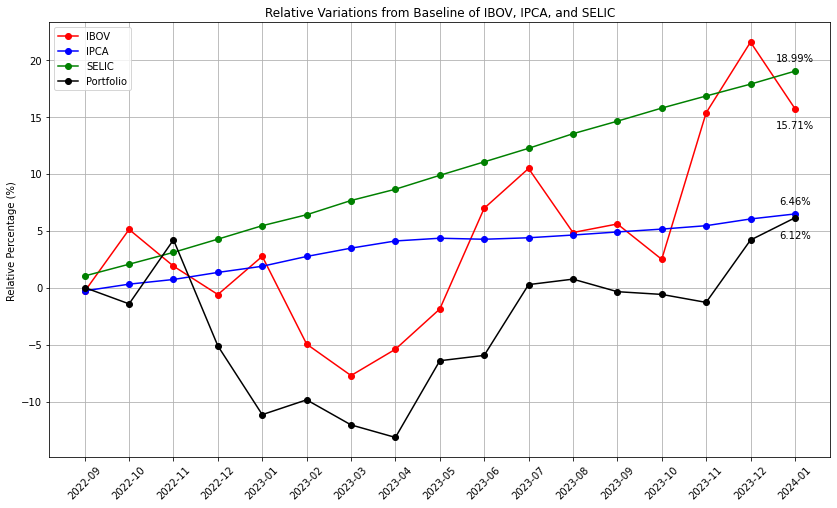

In [187]:
# TODO: plotting graph with values
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_ylabel('Relative Percentage (%)')

# Plotting all adjusted variations with points and annotating each point with its value
ax.plot(market_info['year_month'].astype(str), market_info['ibov'], color='red', label='IBOV', marker='o')
ax.plot(market_info['year_month'].astype(str), market_info['ipca'], color='blue', label='IPCA', marker='o')
ax.plot(market_info['year_month'].astype(str), market_info['selic'], color='green', label='SELIC', marker='o')
ax.plot(market_info['year_month'].astype(str), market_info['selic_percentual'], color='black', label='Portfolio', marker='o')

ax.annotate(f"{market_info['ibov'].astype(str)[-1:].values[0]}%", (market_info['year_month'].astype(str)[-1:], market_info['ibov'][-1:]), textcoords="offset points", xytext=(0,-20), ha='center')
ax.annotate(f"{market_info['ipca'].astype(str)[-1:].values[0]}%", (market_info['year_month'].astype(str)[-1:], market_info['ipca'][-1:]), textcoords="offset points", xytext=(0,10), ha='center')
ax.annotate(f"{market_info['selic'].astype(str)[-1:].values[0]}%", (market_info['year_month'].astype(str)[-1:], market_info['selic'][-1:]), textcoords="offset points", xytext=(0,10), ha='center')
ax.annotate(f"{market_info['selic_percentual'].astype(str)[-1:].values[0]}%", (market_info['year_month'].astype(str)[-1:], market_info['selic_percentual'][-1:]), textcoords="offset points", xytext=(0,-20), ha='center')

ax.grid(True)
ax.legend(loc='upper left')
plt.title('Relative Variations from Baseline of IBOV, IPCA, and SELIC')
plt.xticks(rotation=45)
plt.show()